In [1]:
# Step 1: Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score

# Step 2
data = pd.read_excel('data.xlsx')

In [2]:
train_data = data.iloc[:200, :]
test_data = data.iloc[200:, :]

<function matplotlib.pyplot.show(close=None, block=None)>

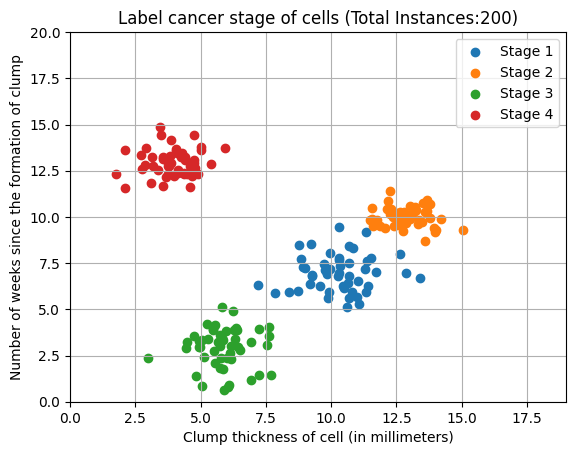

In [3]:
for i in range(1,5,1):

    varx = train_data[train_data["Cancer stage"] == i]["Clump thickness"]
    vary = train_data[train_data["Cancer stage"] == i]["No of week"]
    plt.scatter(varx,vary,label=f'Stage {i}')
plt.xlabel("Clump thickness of cell (in millimeters)")
plt.ylabel("Number of weeks since the formation of clump")
plt.title("Label cancer stage of cells (Total Instances:200)")
plt.xlim(0,19)
plt.ylim(0,20)
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

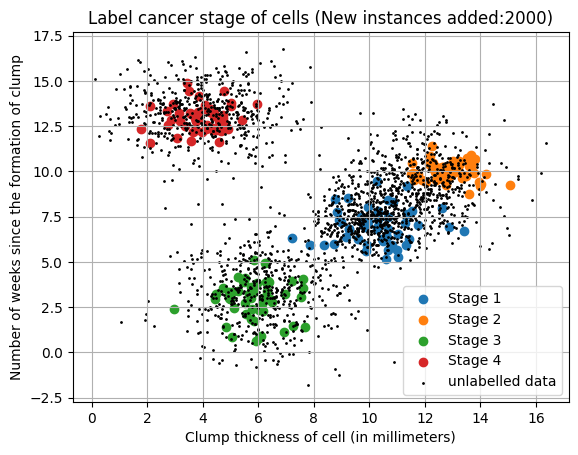

In [4]:
for i in range(1,5,1):
    varx = train_data[train_data["Cancer stage"] == i]["Clump thickness"]
    vary = train_data[train_data["Cancer stage"] == i]["No of week"]
    plt.scatter(varx,vary,label=f'Stage {i}')

plt.scatter(data["Clump thickness_new"],data["No of week_new"],  color='black', label="unlabelled data",s=1)
plt.xlabel("Clump thickness of cell (in millimeters)")
plt.ylabel("Number of weeks since the formation of clump")
plt.title("Label cancer stage of cells (New instances added:2000)")
plt.legend()
plt.grid()
plt.show

In [5]:
training = pd.DataFrame(data = train_data[["Clump thickness","No of week"]])
training.rename(columns={"Clump thickness":"Clump thickness_new","No of week": "No of week_new"},inplace = True)

In [6]:
knn = KNeighborsClassifier(n_neighbors=4)
selftrain = SelfTrainingClassifier(knn,criterion="k_best")
selftrain.fit(training,train_data["Cancer stage"])
prediction = selftrain.predict(data[["Clump thickness_new","No of week_new"]])

/home/uniqueusman/.local/lib/python3.10/site-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/home/uniqueusman/.local/lib/python3.10/site-packages/sklearn/semi_supervised/_self_training.py:217: UserWarning: k_best is larger than the amount of unlabeled samples. All unlabeled samples will be labeled in the first iteration
  warnings.warn(


In [7]:
data_two = pd.concat(objs=(pd.Series(prediction),data),axis=1)

In [8]:
all_vals = np.append(train_data["True cancer stage"].to_numpy(), prediction)
all_vals.shape
all_vals = pd.Series(data=all_vals)
data_2 = pd.concat(objs= (data, all_vals),axis=1)

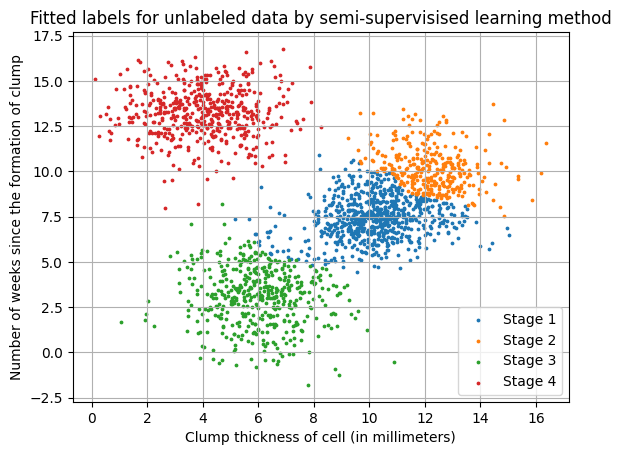

In [9]:
for i in range(1, 5, 1):

    varx = data_two[data_two[0] == i]["Clump thickness_new"]
    vary = data_two[data_two[0] == i]["No of week_new"]
    plt.scatter(varx, vary, label=f'Stage {i}', s=3)
plt.legend()
plt.xlabel("Clump thickness of cell (in millimeters)")
plt.ylabel("Number of weeks since the formation of clump")
plt.title("Fitted labels for unlabeled data by semi-supervisised learning method")
plt.grid()
plt.show()

In [10]:
true_labs = data_two["True cancer stage"]
prediction = data_two[0]

Accuracy Score:  0.8755
Classfication Report:                precision    recall  f1-score   support

           1       0.68      0.98      0.80       500
           2       0.97      0.61      0.75       500
           3       1.00      0.92      0.96       500
           4       0.99      1.00      1.00       500

    accuracy                           0.88      2000
   macro avg       0.91      0.88      0.87      2000
weighted avg       0.91      0.88      0.87      2000



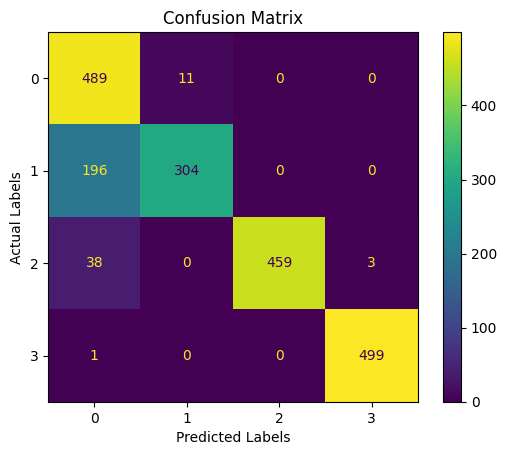

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay


accuracy = accuracy_score(true_labs, prediction)
print("Accuracy Score: ", accuracy)
clss_report = classification_report(true_labs, prediction)
print("Classfication Report: ", clss_report)
conf_mat = confusion_matrix(true_labs, prediction)
# sns.heatmap(conf_mat,annot=True, fmt='d', cmap='Blues')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [12]:
conf_mat

array([[489,  11,   0,   0],
       [196, 304,   0,   0],
       [ 38,   0, 459,   3],
       [  1,   0,   0, 499]])

    1. Provide three applications of Semi-supervised learning.
    i Sentiment Analysis
    ii Speech recognition
    iii Ranking in search engines. 


    2. What are the three assumptions of Semi-supervised learning? 
    i Continuity Assumption
    ii Clustering Assumption
    iii Manifold Assumption

    3. What is significance each of using the above three assumptions in Semi-supervised Learning?
    i. Make it possible for the model to generalize.
    ii. Make it possible to seperate the data into clusters.
    iii. Helps in learning the underlying of the algorithm 


    4. How does the Co-training method differ from the Self-training method of Semi-supervised learning? Which one usually performs better for accuracy and such performance metrics?
    Co-training: Involves training two classifiers on different views of the data and then using each classifier to label unlabeled data for the other classifier.
    Self-training: Involves iteratively training a single classifier on both labeled and unlabeled data, using the classifier's predictions on unlabeled data as additional labeled data.




    5. How to evaluate the performance of a semi-supervised learning method while training?
    i. Using Cross validation
    ii Pseudo-labeling
